# Linked Lists

## Agenda

1. The `LinkedList` and `Node` classes  
2. Implementing `append`
3. Implementing deletion
4. Bidirectional links (Doubly-linked list) & Sentinel head
5. Incorporating a "cursor"
6. Search?
7. Run-time analysis

## 1. The `LinkedList` and `Node` classes

In [46]:
class LinkedList:
    class Node:
        def __init__(self, val, next=None):
            self.val = val
            self.next = next
    
    def __init__(self):
        self.head = None
        self.size = 0
    
    def prepend(self, value):
        self.head = LinkedList.Node(value, next=self.head)
        self.size += 1
    
    def __len__(self):
        return self.size
        
    def __iter__(self):
        n = self.head
        while n:    #while we haven't reached the end of the list
            yield n.val #process element at the current node
            n = n.next  #advance the current node reference
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [47]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [48]:
len(lst)    #same as lst.__len__()

10

## 2. Implementing `append`

### Option 1

In [49]:
class LinkedList (LinkedList): # inheriting from prior definition
    def append(self, value):    # == O(N) --- dreadful
        if self.head is None:   #if the list is empty
            self.prepend(value)
        else:
            #locate the last node
            n = self.head
            while n.next is not None:   #until we find a node whose next is none
                n = n.next
            n.next = LinkedList.Node(value)
            self.size += 1

In [50]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [51]:
len(lst)

10

### Option 2

In [52]:
class LinkedList (LinkedList):
    def __init__(self):
        self.head = self.tail = None
        self.size = 0
        
    def prepend(self, value):   # O(1)
        self.head = LinkedList.Node(value, next=self.head)
        if self.tail is None:
            self.tail = self.head
        self.size += 1
        
    def append(self, value):    # O(1)
        if self.head is None:
            self.prepend(value)
        else:
            self.tail.next = LinkedList.Node(value)
            self.tail = self.tail.next
            # self.tail.next = self.tail = LinkedList.Node(value) is the same as the above two lines
            self.size += 1

In [53]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
for i in range(10):
    lst.append(i)
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 3. Implementing deletion

### Deleting the head

In [54]:
class LinkedList (LinkedList):
    def del_head(self): # O(1)
        assert len(self) > 0
        self.head = self.head.next
        if self.head is None:
            self.tail = None
        self.size -= 1

In [55]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [56]:
lst.del_head()
lst

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Deleting the tail

In [57]:
class LinkedList (LinkedList):
    def del_tail(self): # O(N) -- dreadful
        assert len(self) > 0
        if self.head is self.tail:  #if there's only one node
            self.head = self.tail = None
            self.size = 0
        else:
            n = self.head
            while n.next is not self.tail:
                n = n.next
            n.next = None
            self.tail = n
            self.size -= 1

In [58]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [59]:
lst.del_tail()
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8]

## 4. Bidirectional links (Circular, Doubly-linked list) & Sentinel head

In [60]:
class LinkedList:
    class Node:
        def __init__(self, val, prior=None, next=None):
            self.val = val
            self.prior = prior
            self.next  = next
    
    def __init__(self):
        # setup for the sentinel node (head) [head will always reference the sentinel now]
        self.head = LinkedList.Node(val=None)
        self.head.next = self.head.prior = self.head
        self.size = 0
        
    def prepend(self, value):   # O(1)
        n = LinkedList.Node(value, prior=self.head, next=self.head.next)
        n.next.prior = n    # n is making sure the prior of the next value refers to itself
        n.prior.next = n    # so n essentially inserts itself
        self.size += 1
        
    def append(self, value):   # O(1)
        n = LinkedList.Node(value, prior=self.head.prior, next=self.head)
        n.next.prior = n
        n.prior.next = n
        self.size += 1

    def del_tail(self):   # O(1)
        assert len(self) > 0
        todel = self.head.prior # locating the last node
        todel.prior.next = todel.next   # removing itself by making it skip through todel when iterating
        todel.next.prior = todel.prior  # routing around the todel val removes it
        self.size -= 1
        
    def __len__(self):
        return self.size
        
    def __iter__(self):
        n = self.head.next
        while n is not self.head:
            yield n.val
            n = n.next
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

This implementation effectively gets rid of edge cases

In [61]:
lst = LinkedList()
for i in range(10):
    lst.prepend(i)
for i in range(10):
    lst.append(i)
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [62]:
lst.del_tail()
lst

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8]

In [63]:
class LinkedList (LinkedList):
    def __getitem__(self, idx):   # O(N)
        assert idx >= 0 and idx < len(self)
        n = self.head.next
        for _ in range(idx):
            n = n.next
        return n.val

In [64]:
lst = LinkedList()
for i in range(10):
    lst.append(i)

for i in range(len(lst)):
    print(lst[i])

0
1
2
3
4
5
6
7
8
9


## 5. Incorporating a "cursor"

In [71]:
class LinkedList:
    class Node:
        def __init__(self, val, prior=None, next=None):
            self.val = val
            self.prior = prior
            self.next  = next
    
    def __init__(self):
        self.head = self.cursor = LinkedList.Node(None)
        self.head.prior = self.head.next = self.head
        self.size = 0
                
    def append(self, value):
        n = LinkedList.Node(value, prior=self.head.prior, next=self.head)
        n.prior.next = n.next.prior = n
        self.size += 1

    def __getitem__(self, idx):
        assert idx >= 0 and idx < len(self)
        n = self.head.next
        for _ in range(idx):
            n = n.next
        return n.val
        
    def cursor_set(self, idx):  #position the cursor at this specific element
        assert idx >= 0 and idx < len(self)
        self.cursor = self.head.next
        for _ in range(idx):
            self.cursor = self.cursor.next
    
    def cursor_insert(self, value):   # O(1)
        assert self.cursor is not self.head
        n = LinkedList.Node(value, prior=self.cursor.prior, next=self.cursor)
        n.prior.next = n.next.prior = n
        self.size += 1
    
    def cursor_delete(self):   # O(1)
        assert self.cursor is not self.head
        todel = self.cursor
        self.cursor = self.cursor.next
        todel.next.prior = todel.prior
        todel.prior.next = todel.next
        self.size -= 1
        
    def __len__(self):
        return self.size
        
    def __iter__(self):
        n = self.head.next
        while n is not self.head:
            yield n.val
            n = n.next
    
    def __repr__(self):
        return '[' + ', '.join(repr(x) for x in self) + ']'

In [1]:
l = []
l[0] = 1
l

IndexError: list assignment index out of range

In [72]:
lst = LinkedList()
for i in range(10):
    lst.append(i)
lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [73]:
lst.cursor_set(4)
for x in 'abcd':
    lst.cursor_insert(x)
lst

[0, 1, 2, 3, 'a', 'b', 'c', 'd', 4, 5, 6, 7, 8, 9]

In [74]:
lst.cursor_set(8)
for _ in range(4):
    lst.cursor_delete()
lst

[0, 1, 2, 3, 'a', 'b', 'c', 'd', 8, 9]

## 6. Search?

Linear search with $O(N)$ is the only option when the list is unsorted, but we previously implemented binary search, which runs in $O(\log N)$ time given a sorted list as input.

Does this extend to linked lists?

In [75]:
def contains(lst, x):
    lo = 0
    hi = len(lst)-1
    while lo <= hi: 
        mid = (lo + hi) // 2
        if x < lst[mid]:
            hi = mid - 1
        elif x > lst[mid]:
            lo = mid + 1
        else:
            return True
    else:
        return False

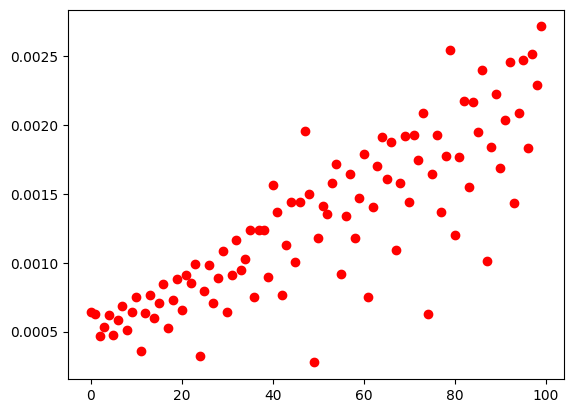

In [76]:
import timeit
import matplotlib.pyplot as plt
import numpy as np

# runtimes when searching for different values in a fixed-size list

def build_sorted_llist(n):
    lst = LinkedList()
    for x in range(n):
        lst.append(x)
    return lst
    
ts = [timeit.timeit(stmt=f'contains(lst, {x})', 
                    setup='lst = build_sorted_llist(100)',
                    globals=globals(), 
                    number=100)
      for x in range(100)]

plt.plot(range(100), ts, 'or');

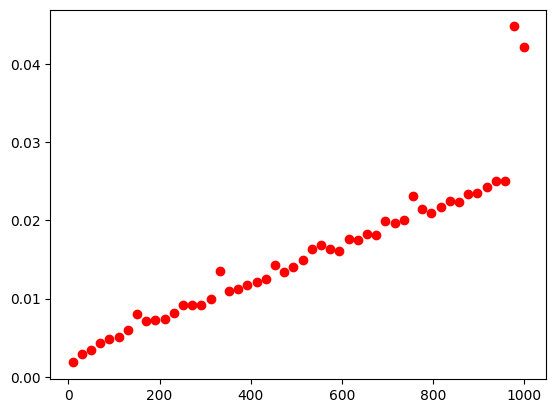

In [77]:
# runtimes when searching for an edge-value in lists of increasing size

ns = np.linspace(10, 1000, 50, dtype=int)
ts = [timeit.timeit('contains(lst, 0)', 
                    setup=f'lst=build_sorted_llist({n})',
                    globals=globals(),
                    number=1000)
      for n in ns]

plt.plot(ns, ts, 'or');

## 7. Runtime analysis

Runtime complexities for circular, doubly-linked list of $N$ elements:

- Indexing (position-based access) = $O(N)$
- Search (unsorted) = $O(N)$
- Search (sorted) = $O(N)$
- Prepend = $O(1)$
- Append = $O(1)$
- Insertion (at arbitrary position): indexing ($O(N)$) + insertion ($O(1)$) = $O(N)$
- Deletion (at arbitrary position): indexing ($O(N)$) + deletion ($O(1)$) = $O(N)$